In [1]:
%matplotlib inline
import pandas as pd
from iridium.chart.trade_chart import TradeChart
from iridium.utils.trading_calendar import DataFrequency

In [2]:
df = pd.read_csv("/Users/evan/.iridium/report.csv")

In [3]:
df

,instrument,state,open_time_local,open_time_timestamp,trade_open_price,initial_units,initial_margin,current_units,realized_profit_loss,spread,close_time_local,close_time_timestamp,trade_close_price,take_profit_price,stop_loss_price,trailing_stop_distance,trailing_stop_price
0,EUR_USD,CLOSED,2019-01-22 09:01:00,1548108060,1.13670,-33898,770.637,0,-23.7268,3,2019-01-25 01:24:00,1548339840,1.137100,NaN,NaN,0.005984,1.137044
1,EUR_USD,CLOSED,2019-01-29 18:18:00,1548746280,1.14414,33254,760.945,0,28.5993,3,2019-02-01 03:21:00,1548951660,1.145300,NaN,NaN,0.006021,1.145309
2,EUR_USD,CLOSED,2019-02-07 09:01:00,1549490460,1.13638,-33914,770.784,0,142.7750,3,2019-02-13 03:42:00,1549989720,1.131870,NaN,NaN,0.005982,1.131782
3,USD_JPY,CLOSED,2019-02-12 09:01:00,1549922460,110.36600,39180,783.600,0,48.9154,3,2019-02-15 01:30:00,1550154600,110.533997,NaN,NaN,0.581830,110.537173
4,EUR_JPY,CLOSED,2019-02-21 09:01:00,1550700060,125.68200,34778,788.612,0,-23.6138,3,2019-02-27 17:36:00,1551249360,125.637001,NaN,NaN,0.658410,125.641593


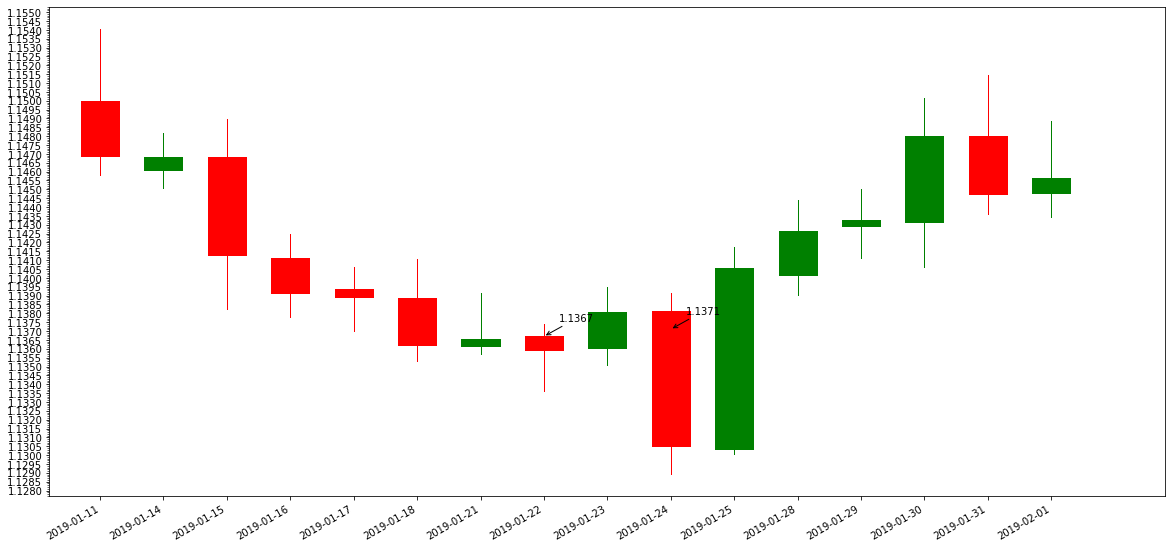

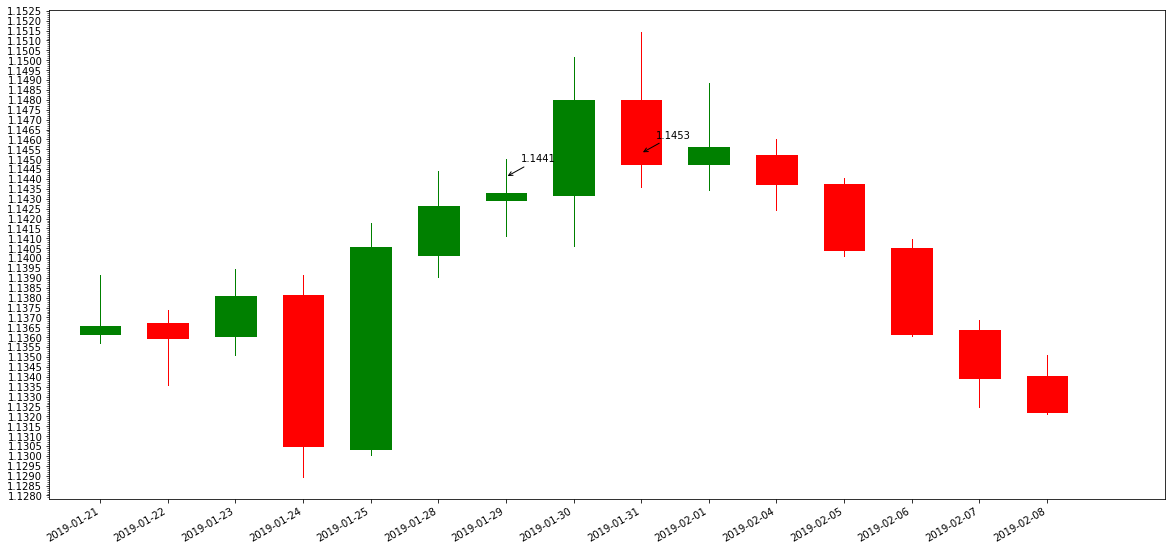

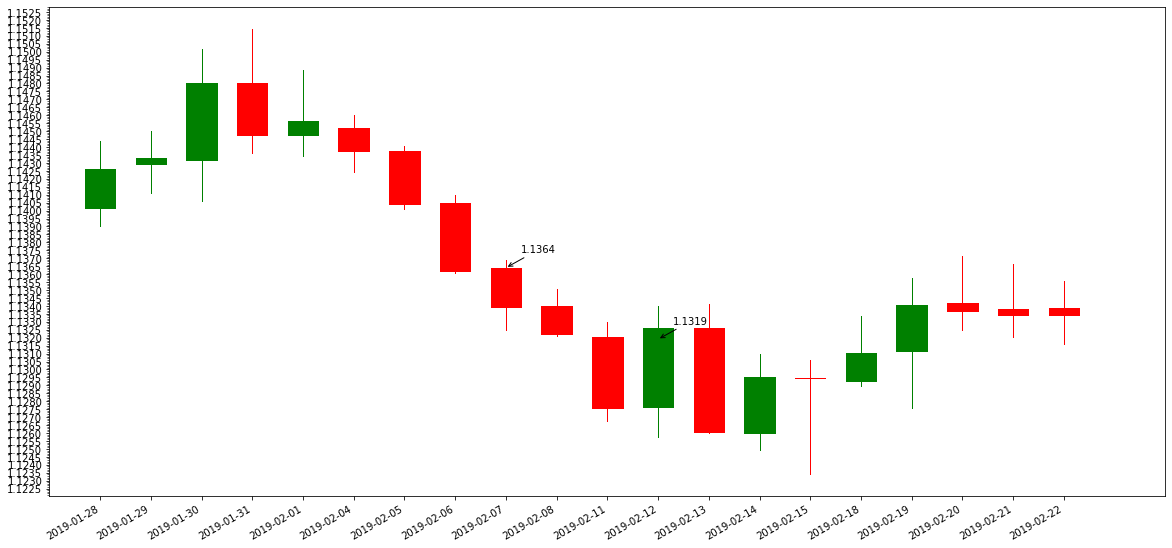

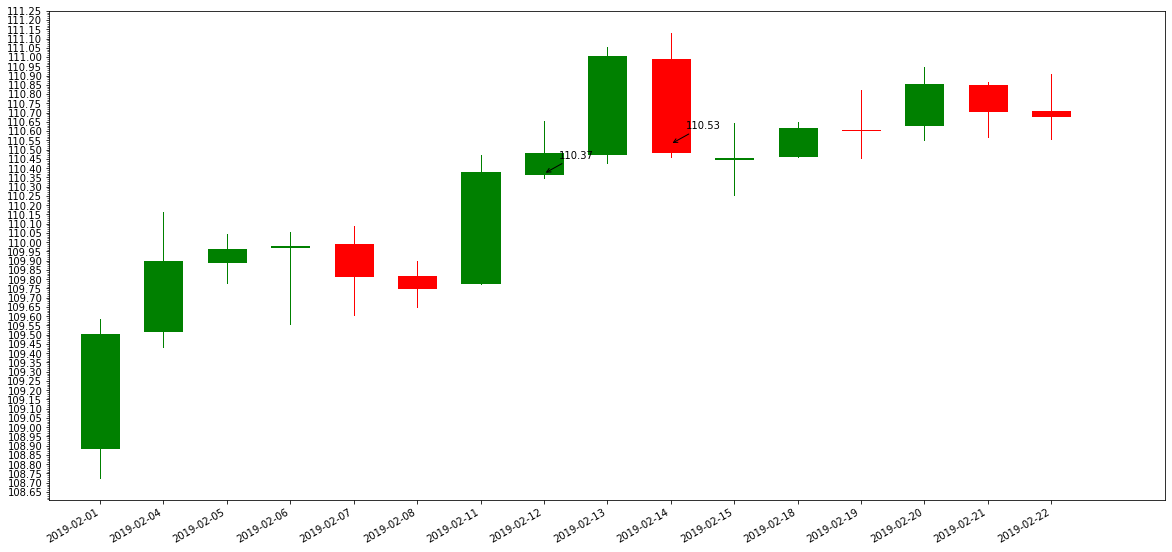

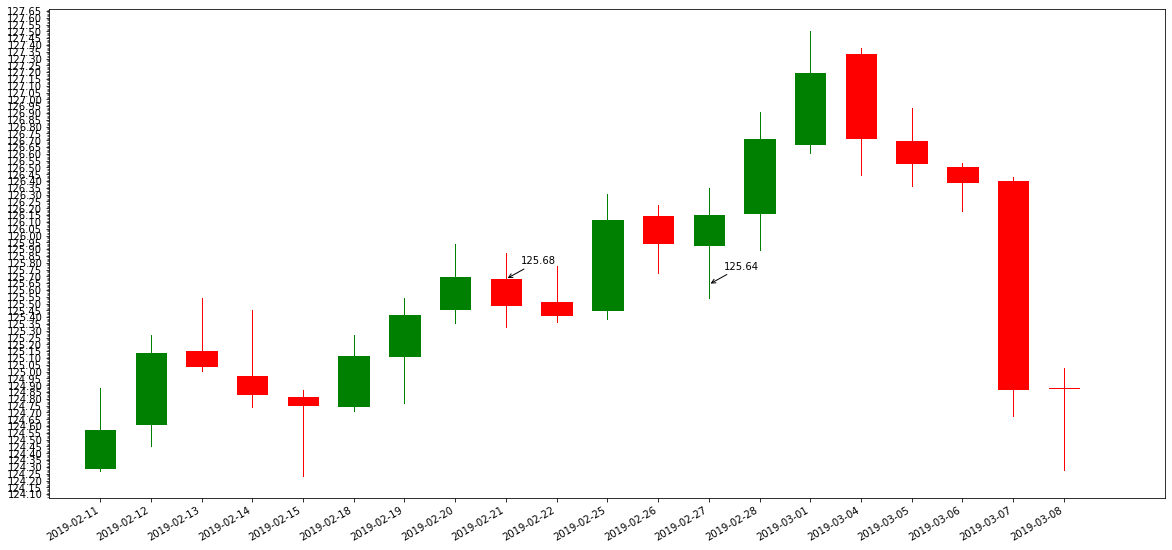

In [4]:
for _, transaction in df.iterrows():
    if transaction.state == 'CLOSED':
        instrument = transaction.instrument
        freq = "D"
        open_time = transaction.open_time_timestamp
        close_time = transaction.close_time_timestamp
        start_offset = 10
        end_offset = 10
        chart = TradeChart(instrument, freq, open_time, close_time, start_offset, end_offset, 1)
        open_price = round(transaction.trade_open_price, chart.pip_num)
        close_price = round(transaction.trade_close_price, chart.pip_num)
        chart.draw_candlestick_chart()
        open_time_idx = chart.date_time_index(open_time)
        chart.add_annotate(open_price, open_time_idx, open_price)
        close_time_idx = chart.date_time_index(close_time)
        chart.add_annotate(close_price, close_time_idx, close_price)